<a href="https://colab.research.google.com/github/jjoo1229/machine-learning-and-deep-learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0day9_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

print(train_input.shape, train_target.shape)

(25000,) (25000,)


In [2]:
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [3]:
len(train_input[0])

218

In [4]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [5]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


-> 평균과 중간값에 차이가 있는 것을 보아 편향된 데이터임을 추측할 수 있음

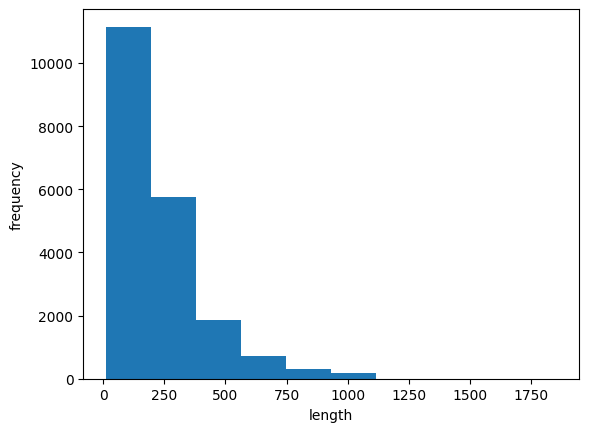

In [6]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [8]:
train_seq.shape

(20000, 100)

In [9]:
train_seq[0]

array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
         2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10,   2, 158], dtype=int32)

In [11]:
train_input[0][-10:]

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]

In [12]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [13]:
val_seq = pad_sequences(val_input, maxlen=100)

In [14]:
#순환 신경망 모델 만들기
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 300)))  #100개의 차원이 300토큰으로
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [16]:
train_oh.shape

(20000, 100, 300)

In [17]:
train_oh[0][0][:12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [18]:
np.sum(train_oh[0][0])

1.0

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 57ms/step - loss: 0.6999 - accuracy: 0.5031 - val_loss: 0.6970 - val_accuracy: 0.5166
Epoch 2/100
  6/313 [..............................] - ETA: 7s - loss: 0.6944 - accuracy: 0.5208

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 36ms/step - loss: 0.6958 - accuracy: 0.5116 - val_loss: 0.6940 - val_accuracy: 0.5224
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6925 - accuracy: 0.5210 - val_loss: 0.6913 - val_accuracy: 0.5294
Epoch 4/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6896 - accuracy: 0.5322 - val_loss: 0.6888 - val_accuracy: 0.5382
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6867 - accuracy: 0.5454 - val_loss: 0.6860 - val_accuracy: 0.5466
Epoch 6/100
313/313 [==============================] - 14s 43ms/step - loss: 0.6830 - accuracy: 0.5588 - val_loss: 0.6818 - val_accuracy: 0.5544
Epoch 7/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6770 - accuracy: 0.5774 - val_loss: 0.6723 - val_accuracy: 0.5810
Epoch 8/100
313/313 [==============================] - 12s 39ms/step - loss: 0.6540 - accuracy: 0.6180 - val_loss: 0.6405 - val_accuracy: 0.63

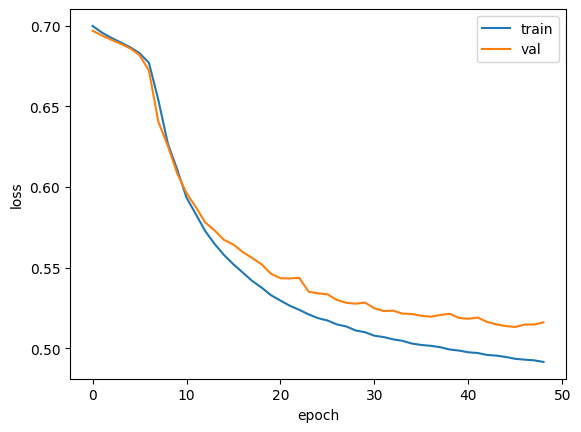

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 26ms/step - loss: 0.6958 - accuracy: 0.4954 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 2/100
  3/313 [..............................] - ETA: 12s - loss: 0.7010 - accuracy: 0.4323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 30ms/step - loss: 0.6926 - accuracy: 0.5135 - val_loss: 0.6920 - val_accuracy: 0.5170
Epoch 3/100
313/313 [==============================] - 10s 33ms/step - loss: 0.6908 - accuracy: 0.5307 - val_loss: 0.6912 - val_accuracy: 0.5212
Epoch 4/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6888 - accuracy: 0.5431 - val_loss: 0.6902 - val_accuracy: 0.5250
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6848 - accuracy: 0.5644 - val_loss: 0.6827 - val_accuracy: 0.5858
Epoch 6/100
313/313 [==============================] - 10s 30ms/step - loss: 0.6709 - accuracy: 0.6316 - val_loss: 0.6675 - val_accuracy: 0.6378
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6546 - accuracy: 0.6679 - val_loss: 0.6527 - val_accuracy: 0.6672
Epoch 8/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6375 - accuracy: 0.6973 - val_loss: 0.6373 - val_accuracy: 0.6920
E